In [1]:
from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()
local_device_protos

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1487058974928930663, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6861853848481732364
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17438875594181771284
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15682967962
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5759657451147699361
 physical_device_desc: "device: 0, name: Quadro P5000, pci bus id: 0000:00:05.0, compute capability: 6.1"]

In [2]:
import tensorflow as tf
print('Eager Execution On ->', tf.executing_eagerly())
print('Tensorflow Version ->', tf.__version__)

Eager Execution On -> True
Tensorflow Version -> 2.1.0-dev20191029


In [3]:
from config import *
from src.utils import *
from src.dataset import *
from src.models import *
from src.losses import *
from src.training import *

In [4]:
path = download_existing_dataset(EXISTING_DATASETS['facades'], 'facades')
print('Dataset Path ->', path)

Dataset Path -> /root/.keras/datasets/facades


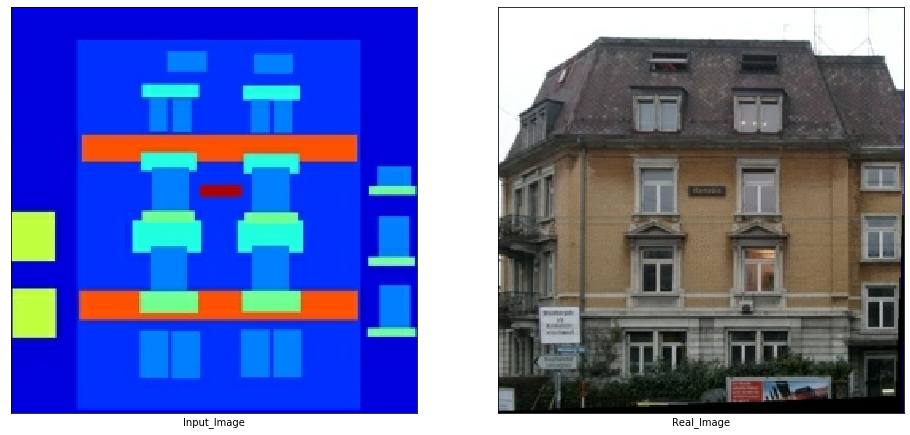

In [5]:
visualize(join(path, 'train/200.jpg'))

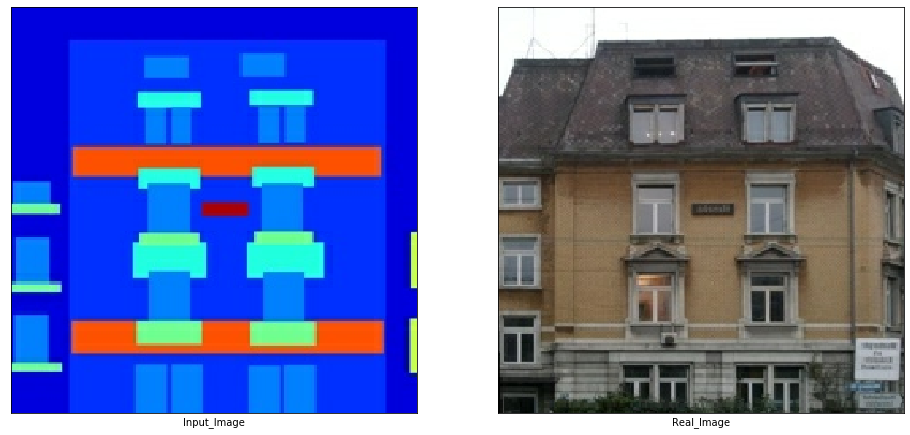

In [6]:
visualize(join(path, 'train/200.jpg'), augment=True)

In [7]:
train_dataset, test_dataset = get_datasets(path)
print(train_dataset)
print(test_dataset)

<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 3)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 256, 256, None), (None, 256, 256, None)), types: (tf.float32, tf.float32)>


In [8]:
generator = Generator()
generator.summary()

Model: "Generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, None, 6 3072        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, None, None, 1 131584      sequential[0][0]                 
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, None, None, 2 525312      sequential_1[0][0]               
__________________________________________________________________________________________

In [9]:
discriminator = Discriminator()
discriminator.summary()

Model: "Discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
target_image (InputLayer)       [(None, None, None,  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, None, None, 6 0           input_image[0][0]                
                                                                 target_image[0][0]               
__________________________________________________________________________________________________
sequential_15 (Sequential)      (None, None, None, 6 6144        concatenate_1[0][0]  

In [10]:
discriminator_optimizer, generator_optimizer = get_optimizers()
checkpoint, checkpoint_prefix = get_checkpoint(
    discriminator, generator,
    discriminator_optimizer,
    generator_optimizer
)

0it [00:00, ?it/s]

Epoch 1 going on....


400it [00:47,  8.39it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 1 is 47.665956258773804 sec

Epoch 2 going on....


400it [00:38, 10.26it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 2 is 38.98178482055664 sec

Epoch 3 going on....


400it [00:38, 10.29it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 3 is 38.88606023788452 sec

Epoch 4 going on....


400it [00:38, 10.27it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 4 is 38.95588040351868 sec

Epoch 5 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 5 is 38.77016282081604 sec

Epoch 6 going on....


400it [00:38, 10.30it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 6 is 38.83570981025696 sec

Epoch 7 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 7 is 38.79991841316223 sec

Epoch 8 going on....


400it [00:38, 10.35it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 8 is 38.66073417663574 sec

Epoch 9 going on....


400it [00:38, 10.30it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 9 is 38.830655097961426 sec

Epoch 10 going on....


400it [00:38, 10.35it/s]


Completed.


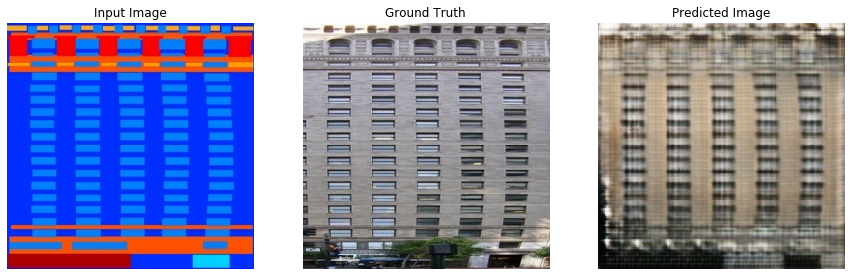

0it [00:00, ?it/s]

Time taken for epoch 10 is 39.38475322723389 sec

Epoch 11 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 11 is 38.80769348144531 sec

Epoch 12 going on....


400it [00:38, 10.29it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 12 is 38.88039255142212 sec

Epoch 13 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 13 is 38.79688501358032 sec

Epoch 14 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 14 is 38.756775856018066 sec

Epoch 15 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 15 is 38.772849798202515 sec

Epoch 16 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 16 is 38.784252882003784 sec

Epoch 17 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 17 is 38.78570771217346 sec

Epoch 18 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 18 is 38.737929582595825 sec

Epoch 19 going on....


400it [00:38, 10.30it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 19 is 38.83022999763489 sec

Epoch 20 going on....


400it [00:38, 10.34it/s]


Completed.


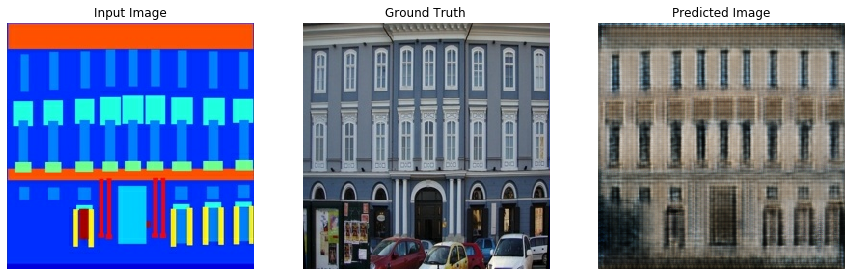

0it [00:00, ?it/s]

Time taken for epoch 20 is 39.48935079574585 sec

Epoch 21 going on....


400it [00:38, 10.34it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 21 is 38.69035029411316 sec

Epoch 22 going on....


400it [00:38, 10.34it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 22 is 38.68066143989563 sec

Epoch 23 going on....


400it [00:38, 10.34it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 23 is 38.69881534576416 sec

Epoch 24 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 24 is 38.755021810531616 sec

Epoch 25 going on....


400it [00:38, 10.34it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 25 is 38.69989895820618 sec

Epoch 26 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 26 is 38.76740598678589 sec

Epoch 27 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 27 is 38.74438762664795 sec

Epoch 28 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 28 is 38.74778890609741 sec

Epoch 29 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 29 is 38.813071727752686 sec

Epoch 30 going on....


400it [00:38, 10.29it/s]


Completed.


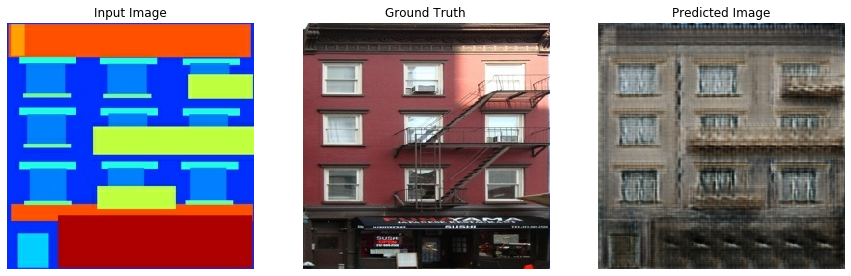

0it [00:00, ?it/s]

Time taken for epoch 30 is 39.67228984832764 sec

Epoch 31 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 31 is 38.81344532966614 sec

Epoch 32 going on....


400it [00:38, 10.30it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 32 is 38.832236528396606 sec

Epoch 33 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 33 is 38.766388177871704 sec

Epoch 34 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 34 is 38.73595190048218 sec

Epoch 35 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 35 is 38.74377489089966 sec

Epoch 36 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 36 is 38.724217653274536 sec

Epoch 37 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 37 is 38.763535022735596 sec

Epoch 38 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 38 is 38.80126762390137 sec

Epoch 39 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 39 is 38.720635175704956 sec

Epoch 40 going on....


400it [00:38, 10.33it/s]


Completed.


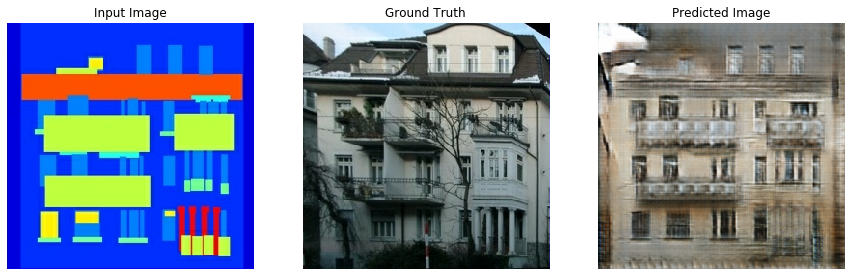

0it [00:00, ?it/s]

Time taken for epoch 40 is 39.5575737953186 sec

Epoch 41 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 41 is 38.74516749382019 sec

Epoch 42 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 42 is 38.77708458900452 sec

Epoch 43 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 43 is 38.794944286346436 sec

Epoch 44 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 44 is 38.77927279472351 sec

Epoch 45 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 45 is 38.769773960113525 sec

Epoch 46 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 46 is 38.76804304122925 sec

Epoch 47 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 47 is 38.79019474983215 sec

Epoch 48 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 48 is 38.79685592651367 sec

Epoch 49 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 49 is 38.74293065071106 sec

Epoch 50 going on....


400it [00:38, 10.32it/s]


Completed.


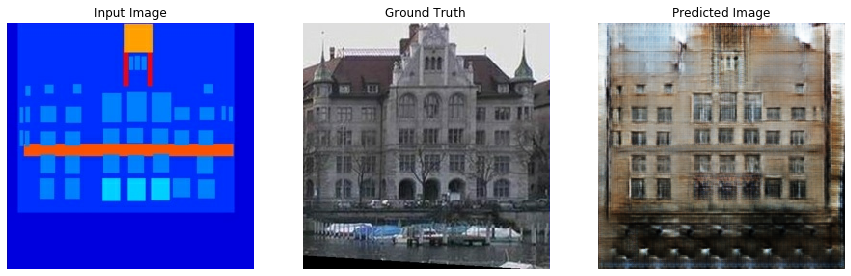

0it [00:00, ?it/s]

Time taken for epoch 50 is 39.53545379638672 sec

Epoch 51 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 51 is 38.75502157211304 sec

Epoch 52 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 52 is 38.72514629364014 sec

Epoch 53 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 53 is 38.77657771110535 sec

Epoch 54 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 54 is 38.76801133155823 sec

Epoch 55 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 55 is 38.816654920578 sec

Epoch 56 going on....


400it [00:38, 10.30it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 56 is 38.826441049575806 sec

Epoch 57 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 57 is 38.74907088279724 sec

Epoch 58 going on....


400it [00:38, 10.31it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 58 is 38.81746220588684 sec

Epoch 59 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 59 is 38.71140432357788 sec

Epoch 60 going on....


400it [00:38, 10.31it/s]


Completed.


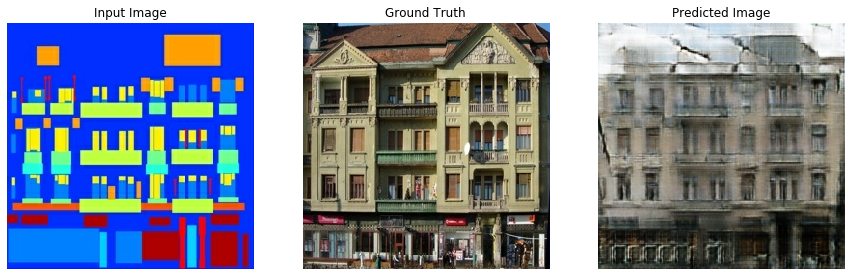

0it [00:00, ?it/s]

Time taken for epoch 60 is 39.59404492378235 sec

Epoch 61 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 61 is 38.74091815948486 sec

Epoch 62 going on....


400it [00:38, 10.35it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 62 is 38.641966819763184 sec

Epoch 63 going on....


400it [00:38, 10.35it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 63 is 38.65725350379944 sec

Epoch 64 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 64 is 38.57630467414856 sec

Epoch 65 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 65 is 38.61532807350159 sec

Epoch 66 going on....


400it [00:38, 10.33it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 66 is 38.70844268798828 sec

Epoch 67 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 67 is 38.76935529708862 sec

Epoch 68 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 68 is 38.77907371520996 sec

Epoch 69 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 69 is 38.779664516448975 sec

Epoch 70 going on....


400it [00:38, 10.31it/s]


Completed.


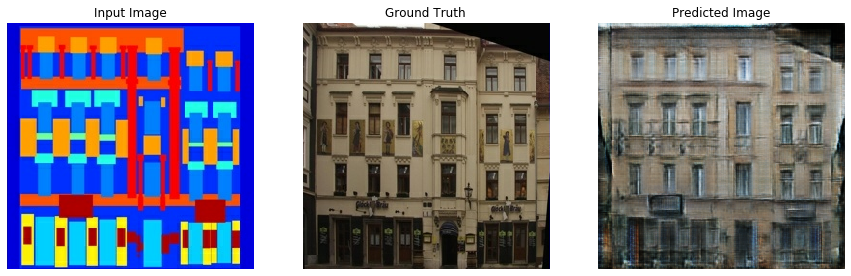

0it [00:00, ?it/s]

Time taken for epoch 70 is 39.62258839607239 sec

Epoch 71 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 71 is 38.77059817314148 sec

Epoch 72 going on....


400it [00:38, 10.32it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 72 is 38.75388836860657 sec

Epoch 73 going on....


400it [00:38, 10.34it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 73 is 38.69888520240784 sec

Epoch 74 going on....


400it [00:38, 10.34it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 74 is 38.67970824241638 sec

Epoch 75 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 75 is 38.602033615112305 sec

Epoch 76 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 76 is 38.599820375442505 sec

Epoch 77 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 77 is 38.55428099632263 sec

Epoch 78 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 78 is 38.577510356903076 sec

Epoch 79 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 79 is 38.61033749580383 sec

Epoch 80 going on....


400it [00:38, 10.38it/s]


Completed.


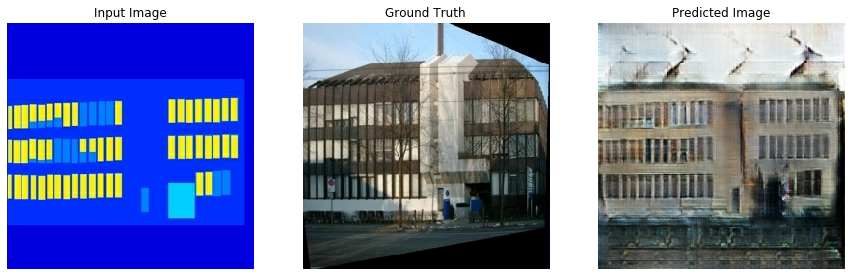

0it [00:00, ?it/s]

Time taken for epoch 80 is 39.19969654083252 sec

Epoch 81 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 81 is 38.5467050075531 sec

Epoch 82 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 82 is 38.5249342918396 sec

Epoch 83 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 83 is 38.54013252258301 sec

Epoch 84 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 84 is 38.545936822891235 sec

Epoch 85 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 85 is 38.53726410865784 sec

Epoch 86 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 86 is 38.52768588066101 sec

Epoch 87 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 87 is 38.53589057922363 sec

Epoch 88 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 88 is 38.52636194229126 sec

Epoch 89 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 89 is 38.54273867607117 sec

Epoch 90 going on....


400it [00:38, 10.38it/s]


Completed.


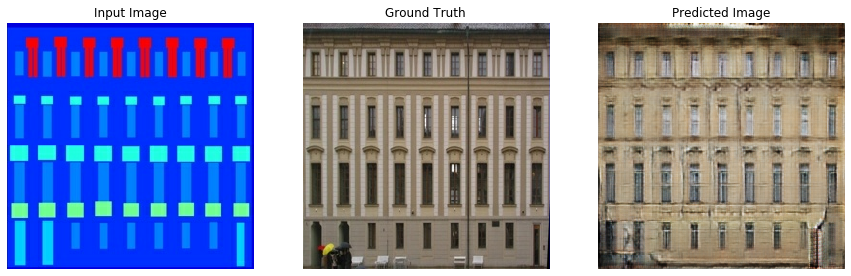

0it [00:00, ?it/s]

Time taken for epoch 90 is 39.271888732910156 sec

Epoch 91 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 91 is 38.52748990058899 sec

Epoch 92 going on....


400it [00:38, 10.35it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 92 is 38.6697211265564 sec

Epoch 93 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 93 is 38.53875470161438 sec

Epoch 94 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 94 is 38.52608108520508 sec

Epoch 95 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 95 is 38.5547661781311 sec

Epoch 96 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 96 is 38.54819369316101 sec

Epoch 97 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 97 is 38.526814222335815 sec

Epoch 98 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 98 is 38.536784172058105 sec

Epoch 99 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 99 is 38.540942668914795 sec

Epoch 100 going on....


400it [00:38, 10.37it/s]


Completed.


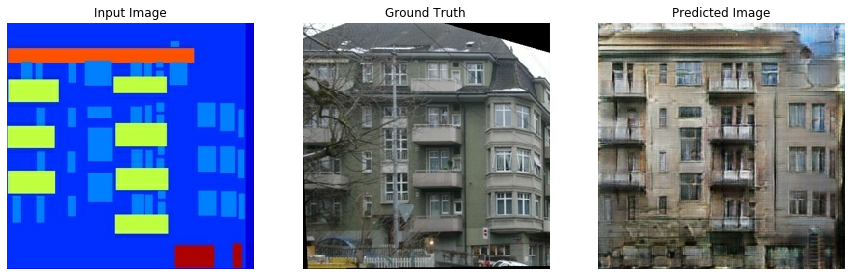

0it [00:00, ?it/s]

Time taken for epoch 100 is 39.38640999794006 sec

Epoch 101 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 101 is 38.55533456802368 sec

Epoch 102 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 102 is 38.602705001831055 sec

Epoch 103 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 103 is 38.60910654067993 sec

Epoch 104 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 104 is 38.53630447387695 sec

Epoch 105 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 105 is 38.55147910118103 sec

Epoch 106 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 106 is 38.54020833969116 sec

Epoch 107 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 107 is 38.53774285316467 sec

Epoch 108 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 108 is 38.58151698112488 sec

Epoch 109 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 109 is 38.55751919746399 sec

Epoch 110 going on....


400it [00:38, 10.39it/s]


Completed.


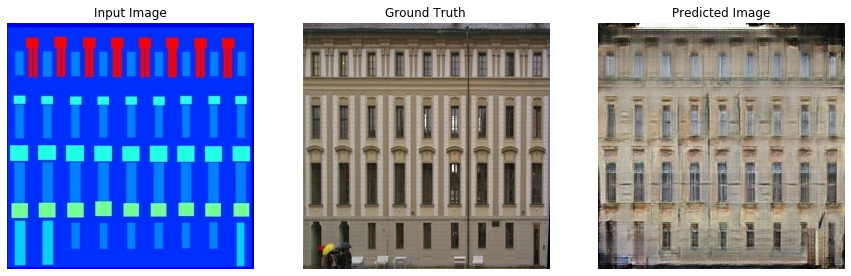

0it [00:00, ?it/s]

Time taken for epoch 110 is 39.27293872833252 sec

Epoch 111 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 111 is 38.56300592422485 sec

Epoch 112 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 112 is 38.57922101020813 sec

Epoch 113 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 113 is 38.60942029953003 sec

Epoch 114 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 114 is 38.582900047302246 sec

Epoch 115 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 115 is 38.589951515197754 sec

Epoch 116 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 116 is 38.60432028770447 sec

Epoch 117 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 117 is 38.61459493637085 sec

Epoch 118 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 118 is 38.57354974746704 sec

Epoch 119 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 119 is 38.57961463928223 sec

Epoch 120 going on....


400it [00:38, 10.36it/s]


Completed.


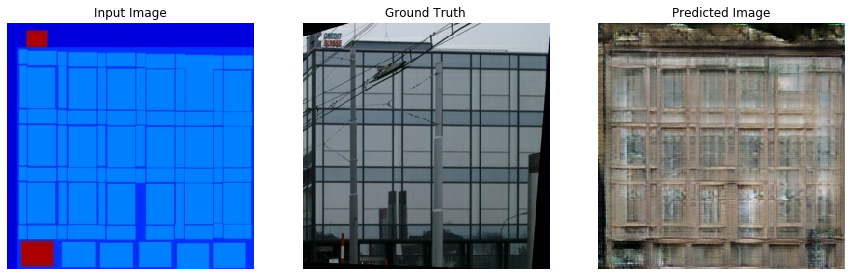

0it [00:00, ?it/s]

Time taken for epoch 120 is 39.43252420425415 sec

Epoch 121 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 121 is 38.582998275756836 sec

Epoch 122 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 122 is 38.61050796508789 sec

Epoch 123 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 123 is 38.602776527404785 sec

Epoch 124 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 124 is 38.61930060386658 sec

Epoch 125 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 125 is 38.62849259376526 sec

Epoch 126 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 126 is 38.62535381317139 sec

Epoch 127 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 127 is 38.61148810386658 sec

Epoch 128 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 128 is 38.58283734321594 sec

Epoch 129 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 129 is 38.572460412979126 sec

Epoch 130 going on....


400it [00:38, 10.37it/s]


Completed.


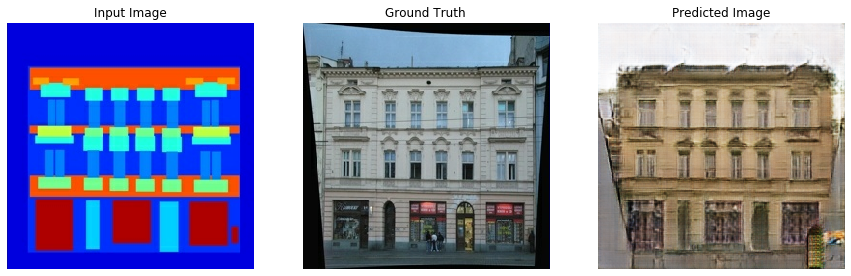

0it [00:00, ?it/s]

Time taken for epoch 130 is 39.36158084869385 sec

Epoch 131 going on....


400it [00:38, 10.38it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 131 is 38.55282664299011 sec

Epoch 132 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 132 is 38.59541988372803 sec

Epoch 133 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 133 is 38.57540035247803 sec

Epoch 134 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 134 is 38.59490609169006 sec

Epoch 135 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 135 is 38.573755502700806 sec

Epoch 136 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 136 is 38.598961353302 sec

Epoch 137 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 137 is 38.58860540390015 sec

Epoch 138 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 138 is 38.59227991104126 sec

Epoch 139 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 139 is 38.60486364364624 sec

Epoch 140 going on....


400it [00:38, 10.36it/s]


Completed.


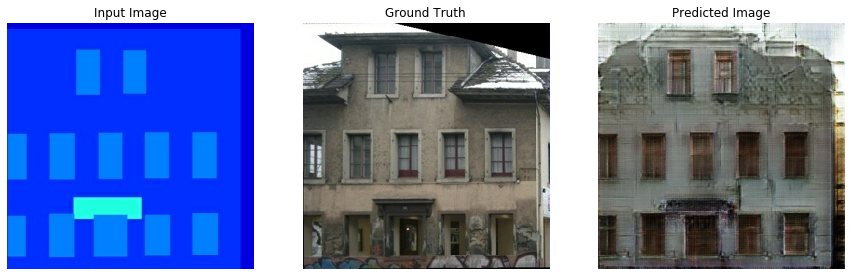

0it [00:00, ?it/s]

Time taken for epoch 140 is 39.395936489105225 sec

Epoch 141 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 141 is 38.592610597610474 sec

Epoch 142 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 142 is 38.59050226211548 sec

Epoch 143 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 143 is 38.62240648269653 sec

Epoch 144 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 144 is 38.61799240112305 sec

Epoch 145 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 145 is 38.608795404434204 sec

Epoch 146 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 146 is 38.59856820106506 sec

Epoch 147 going on....


400it [00:38, 10.36it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 147 is 38.60639429092407 sec

Epoch 148 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 148 is 38.58380198478699 sec

Epoch 149 going on....


400it [00:38, 10.37it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 149 is 38.5905544757843 sec

Epoch 150 going on....


400it [00:38, 10.36it/s]


Completed.


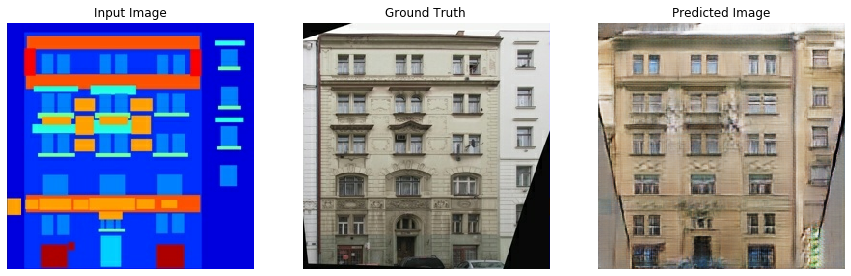

Time taken for epoch 150 is 39.23114347457886 sec



In [11]:
generator_loss_history, discriminator_loss_history = train(
    discriminator, generator,
    discriminator_optimizer,
    generator_optimizer,
    train_dataset, test_dataset,
    checkpoint, checkpoint_prefix
)

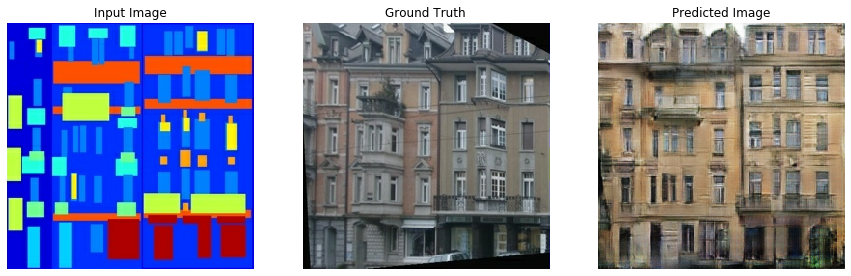

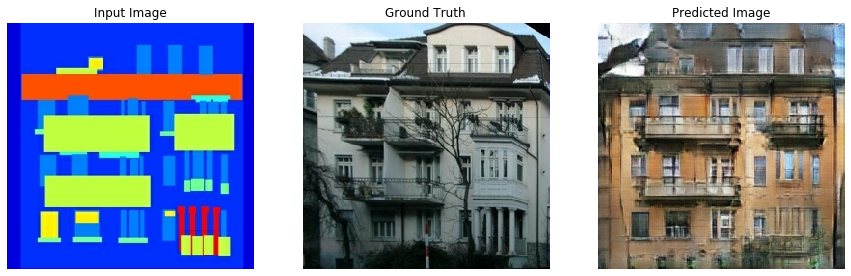

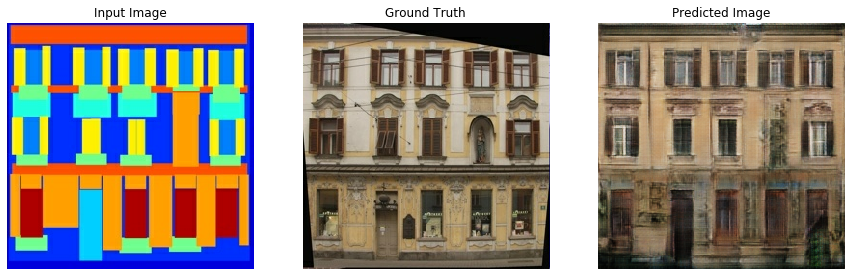

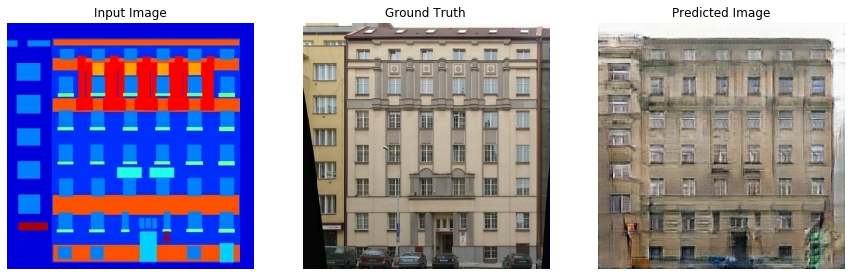

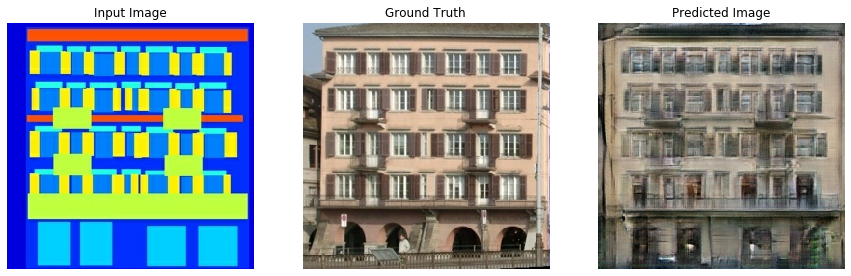

In [12]:
for _input, _target in test_dataset.take(5):
    generate_images(generator, _input, _target)